In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from uvb_abun_pairwise_compare import *
import h5py

In [2]:
with open("/mnt/scratch/tairaeli/halo2392_pcw_2019/redshift2.0/data/salsa_out_dict.pickle", "rb") as salsa_dat:
    pcw_dat = pickle.load(salsa_dat)

with open("/mnt/scratch/tairaeli/halo2392_hm_2012/redshift2.0/data/salsa_out_dict.pickle", "rb") as salsa_dat:
    hm_dat = pickle.load(salsa_dat)

with open("/mnt/scratch/tairaeli/halo2392_fg_2009/redshift2.0/data/salsa_out_dict.pickle", "rb") as salsa_dat:
    fg_dat = pickle.load(salsa_dat)

In [3]:
pcw_v_hm = pcw_dat
pcw_v_hm["C II"]["HM_2012"] = hm_dat["C II"]["HM_2012"]
pcw_v_hm["C IV"]["HM_2012"] = hm_dat["C IV"]["HM_2012"]
pcw_v_hm["O VI"]["HM_2012"] = hm_dat["O VI"]["HM_2012"]

In [4]:
ion_list = ["C II", "C IV", "O VI"]
nrays = 4

pcw_v_hm_comp = pairwise_compare(pcw_v_hm, ion_list, nrays)

mx 15
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
id1 6
id2 6
id1 7
id2 7
id1 8
id2 8
id1 9
id2 9
id1 10
id2 10
id1 11
id2 11
id1 12
id2 12
id1 13
id2 13
id1 14
id2 13
mx 8
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
id1 5
id2 6
id1 5
id2 7
mx 10
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 4
id2 5
id1 4
id2 6
id1 4
id2 7
id1 4
id2 8
id1 4
id2 9
mx 6
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
mx 13
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
id1 6
id2 5
id1 7
id2 6
id1 8
id2 7
id1 9
id2 8
id1 10
id2 9
id1 11
id2 10
id1 12
id2 11
mx 9
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 2
id2 3
id1 3
id2 4
id1 4
id2 5
id1 5
id2 6
id1 6
id2 7
id1 7
id2 8
mx 10
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 4
id1 4
id2 5
id1 4
id2 6
id1 5
id2 8
id1 6
id2 9
mx 9
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
id1 6
id2 6
id1 7
id2 7
id1 8
id2 8
mx 23

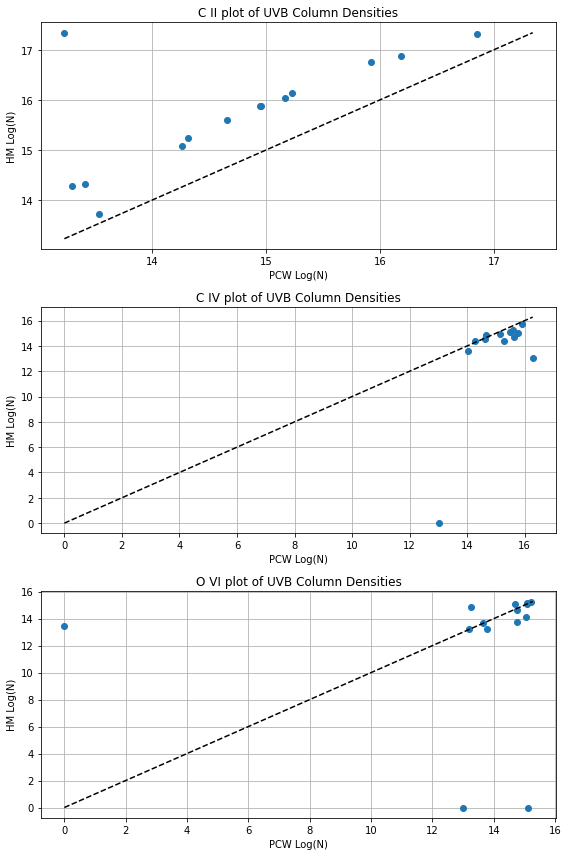

In [5]:
fig, ax = plt.subplots(3,1, figsize = [8,12])

ray = 0

for i, ion in enumerate(ion_list):
    pcw_dens = pcw_v_hm_comp[1][ion][ray]
    hm_dens = pcw_v_hm_comp[2][ion][ray]
    
    small_dens = np.min([pcw_dens, hm_dens])
    large_dens = np.max([pcw_dens, hm_dens])
    
    sim_line = np.linspace(small_dens, large_dens, 20)
    
    ax[i].plot(pcw_dens,hm_dens, "o")
    ax[i].plot(sim_line,sim_line, "--", color = "black")
    ax[i].set_xlabel("PCW Log(N)")
    ax[i].set_ylabel("HM Log(N)")
    ax[i].set_title(f"{ion} plot of UVB Column Densities")
    ax[i].grid()
    

plt.tight_layout()

In [6]:
def compare_clump_dat(df_list,df_name_list,ion,ray):
    dens_list = []
    for i,df in enumerate(df_list):
        df_ion_ray = df[ion][df_name_list[i]][df[ion][df_name_list[i]]["lightray_index"] == str(ray)]

        df_clump_dens = np.zeros(df_ion_ray["interval_end"][len(df_ion_ray["col_dens"])-1])

        for iclump in range(len(df_ion_ray["col_dens"])-1):
            df_clump_dens[int(df_ion_ray["interval_start"][iclump]):int(df_ion_ray["interval_end"][iclump])]\
            = df_ion_ray["col_dens"][iclump]
        
        dens_list.append(df_clump_dens)
    
    return dens_list

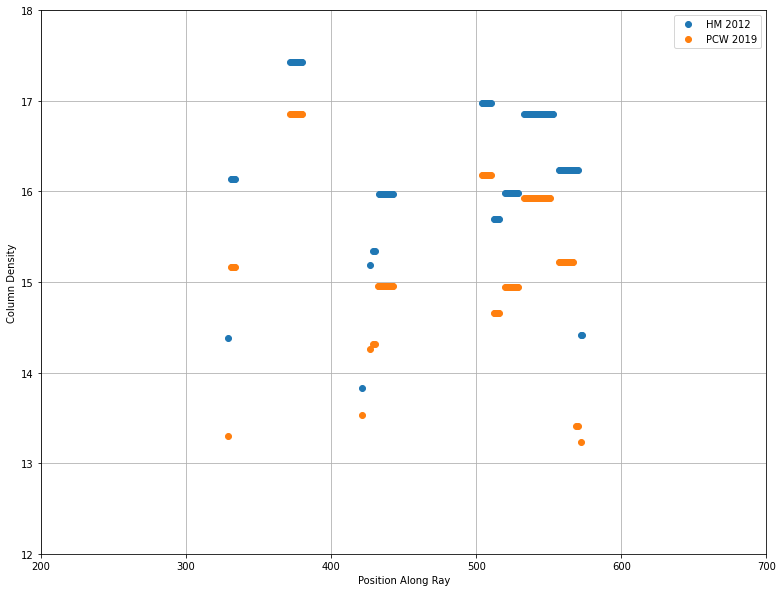

In [7]:
hm_dens,pcw_dens = compare_clump_dat([hm_dat,pcw_dat],["HM_2012","PCW_2019"],"C II",0)

plt.figure(figsize = [13,10])
plt.plot(hm_dens+0.1, label = "HM 2012", linestyle = "None", marker = "o")
plt.plot(pcw_dens, label = "PCW 2019", linestyle = "None", marker = "o")

plt.ylim(12,18)
plt.xlim(200,700)
plt.xlabel("Position Along Ray")
plt.ylabel("Column Density")
plt.grid()
plt.legend()

In [19]:
ray = 0

hm_ray = h5py.File(f"/mnt/scratch/tairaeli/halo2392_hm_2012/redshift2.0/rays/ray{ray}.h5",\
                 "r")
print(list(hm_ray["grid"].keys()))
hm_ray_dens = np.array(hm_ray["grid"]["H_p0_number_density"])
hm_ray.close()

ion = "C II"
name = "HM_2012"

ray_dat = hm_dat[ion][name][hm_dat[ion][name]["lightray_index"] == str(ray)]

# clump_ids = np.zeros([len(ray_dat["interval_end"]),2])
# for i in range(len(ray_dat["interval_end"])):
#     clump_ids[i,:] = [ray_dat["interval_start"][i]
#                       ,ray_dat["interval_end"][i]]

['H_nuclei_density', 'H_p0_number_density', 'density', 'dl', 'dx', 'dy', 'dz', 'l', 'metallicity', 'radius', 'redshift', 'redshift_dopp', 'redshift_eff', 'relative_velocity_x', 'relative_velocity_y', 'relative_velocity_z', 'temperature', 'velocity_los', 'x', 'y', 'z']


ValueError: operands could not be broadcast together with shapes (916,) (14,) 

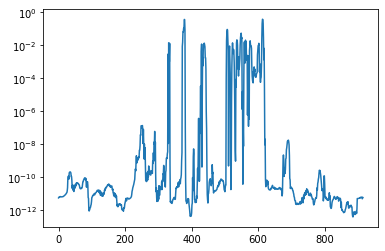

In [23]:
plt.semilogy(hm_ray_dens,label = "HM_ray_dat")
plt.fill_between(hm_ray_dens,ray_dat["interval_start"],ray_dat["interval_end"],
                alpha = 0.3)

In [ ]:
# generating histogram plots
fig, ax = plt.subplots(3,1, figsize = [8,12])

ray = 0

uvb_names = ["PCW_2019","HM_2012","FG_2009"]
uvb_list = [pcw_dat, hm_dat, fg_dat]

for i, ion in enumerate(ion_list):
    
    for j, name in enumerate(uvb_names):
        
        col_dens = uvb_list[j][ion][name]["col_dens"]
        
        num_dens, bin_edge = np.histogram(col_dens, bins = 16)

        bin_center = 0.5 * (bin_edge[1:] + bin_edge[:-1])

        ax[i].plot(bin_center, num_dens, label = name)
        
    ax[i].set_xlabel("Colunm Density Log(N)")
    ax[i].set_ylabel("# of Clumps")
    ax[i].set_title(f"{ion} Clump Column Density Histogram")
    ax[i].legend()
    ax[i].grid()
    

plt.tight_layout()

###### 